Data analysis

In [2]:
import pandas as pd
df = pd.read_csv('/content/Assignment_Train.csv')

In [3]:
df.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   MIDDLE NAME                          2855 non-null   object 
 6   LAST NAME                            9319 non-null   object 
 7   mobile                               10000 non-null  int64  
 8   AADHAR VERIFIED                      10000 non-null  object 
 9   Cibil Score                          5703 non-null   object 
 10  MOBILE VERIFICATION                  10000 non-null  bool   
 11  DEALER NAME                  

Column names have space in them

In [5]:
df = df.rename(columns = lambda x: x.replace(" ", "_"))

Too many null values.

In [6]:
df.isnull().sum()

,0
DEALER_ID,0
APPLICATION_LOGIN_DATE,0
HDB_BRANCH_NAME,1
HDB_BRANCH_STATE,854
FIRST_NAME,0
MIDDLE_NAME,7145
LAST_NAME,681
mobile,0
AADHAR_VERIFIED,0
Cibil_Score,4297


Dropping irrelavent features

In [7]:
df = df.drop(['FIRST_NAME', 'MIDDLE_NAME', 'LAST_NAME', 'mobile', 'DEALER_NAME', 'DOB', 'EMPLOYER_NAME', 'Pan_Name', 'name', 'APPLICATION_LOGIN_DATE', 'AADHAR_VERIFIED', 'HDB_BRANCH_NAME', 'Primary_Asset_Model_No', 'Personal_Email_Address', 'upi_name', 'EMPLOYER_TYPE', 'MOBILE_VERIFICATION'], axis=1)

Concatinating similar feature to reduce curse of dimentionality

In [8]:
import numpy as np

cols_to_concat = [col for col in df.columns if col.startswith('Phone_Social_Premium')]

df[cols_to_concat] = df[cols_to_concat].apply(pd.to_numeric, errors='coerce')

df['Phone_Social_Premium'] = df[cols_to_concat].sum(axis=1)

df = df.drop(cols_to_concat, axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER_ID                            10000 non-null  int64  
 1   HDB_BRANCH_STATE                     9146 non-null   object 
 2   Cibil_Score                          5703 non-null   object 
 3   TOTAL_ASSET_COST                     4892 non-null   float64
 4   ASSET_CTG                            4892 non-null   object 
 5   ASSET_MODEL_NO                       10000 non-null  int64  
 6   APPLIED_AMOUNT                       10000 non-null  int64  
 7   PRIMARY_ASSET_MAKE                   10000 non-null  object 
 8   MARITAL_STATUS                       5106 non-null   object 
 9   GENDER                               10000 non-null  object 
 10  AGE                                  10000 non-null  int64  
 11  ADDRESS_TYPE                 

One hot encoding and type change of the feature

In [10]:
df['Application_Status'] = df['Application_Status'].apply(lambda x: 1 if x == 'APPROVED' else 0)

In [11]:
import pandas as pd
def convert_to_numeric(col):
  df[f'{col}'] = pd.to_numeric(df[f'{col}'], errors='coerce')

  df[f'{col}'] = df[f'{col}'].round().astype('Int64')

In [12]:
convert_to_numeric('Cibil_Score')
convert_to_numeric('TOTAL_ASSET_COST')
convert_to_numeric('phone_digitalage')
convert_to_numeric('phone_nameMatchScore')
convert_to_numeric('phone_nameMatchScore')

In [13]:
df.isnull().sum()

,0
DEALER_ID,0
HDB_BRANCH_STATE,854
Cibil_Score,4335
TOTAL_ASSET_COST,5108
ASSET_CTG,5108
ASSET_MODEL_NO,0
APPLIED_AMOUNT,0
PRIMARY_ASSET_MAKE,0
MARITAL_STATUS,4894
GENDER,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER_ID                            10000 non-null  int64  
 1   HDB_BRANCH_STATE                     9146 non-null   object 
 2   Cibil_Score                          5665 non-null   Int64  
 3   TOTAL_ASSET_COST                     4892 non-null   Int64  
 4   ASSET_CTG                            4892 non-null   object 
 5   ASSET_MODEL_NO                       10000 non-null  int64  
 6   APPLIED_AMOUNT                       10000 non-null  int64  
 7   PRIMARY_ASSET_MAKE                   10000 non-null  object 
 8   MARITAL_STATUS                       5106 non-null   object 
 9   GENDER                               10000 non-null  object 
 10  AGE                                  10000 non-null  int64  
 11  ADDRESS_TYPE                 

In [15]:

import pandas as pd
object_cols = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=object_cols)


In [16]:

df.isnull().sum()


,0
DEALER_ID,0
Cibil_Score,4335
TOTAL_ASSET_COST,5108
ASSET_MODEL_NO,0
APPLIED_AMOUNT,0
...,...
phone_phoneFootprintStrengthOverall_High,0
phone_phoneFootprintStrengthOverall_Low,0
phone_phoneFootprintStrengthOverall_Medium,0
phone_phoneFootprintStrengthOverall_Very High,0


Imputing empty values using advanced techniques like KNN

Outliers

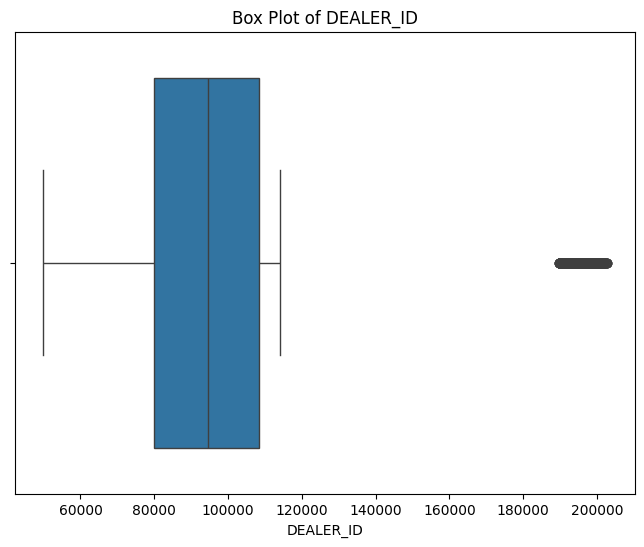

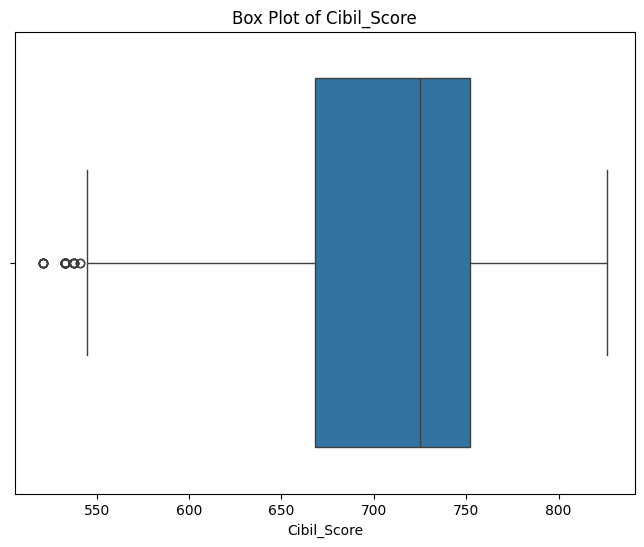

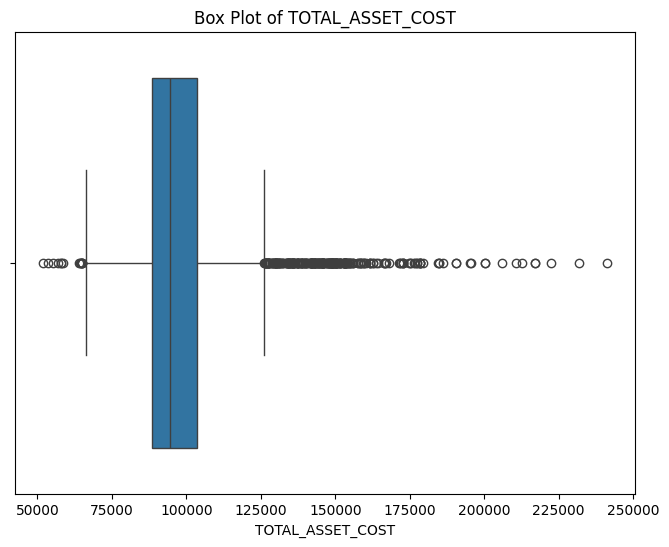

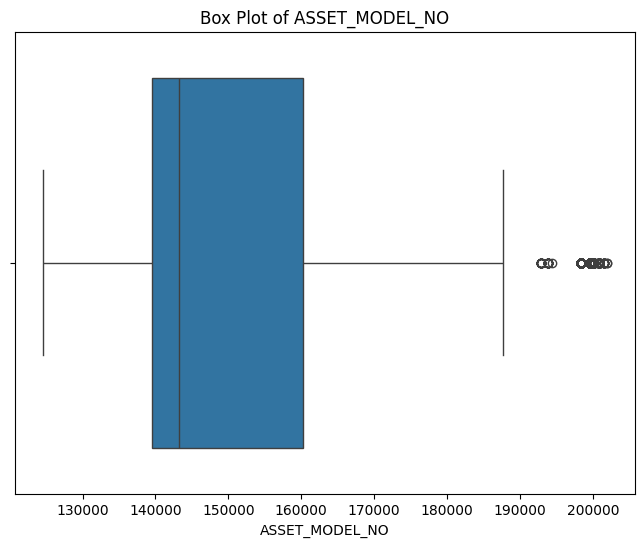

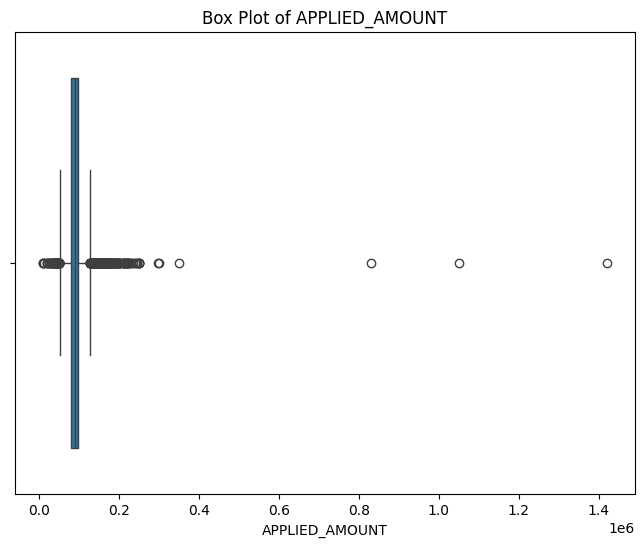

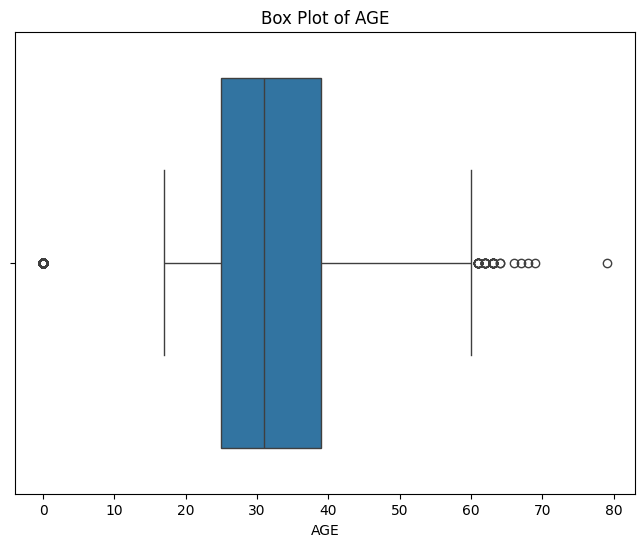

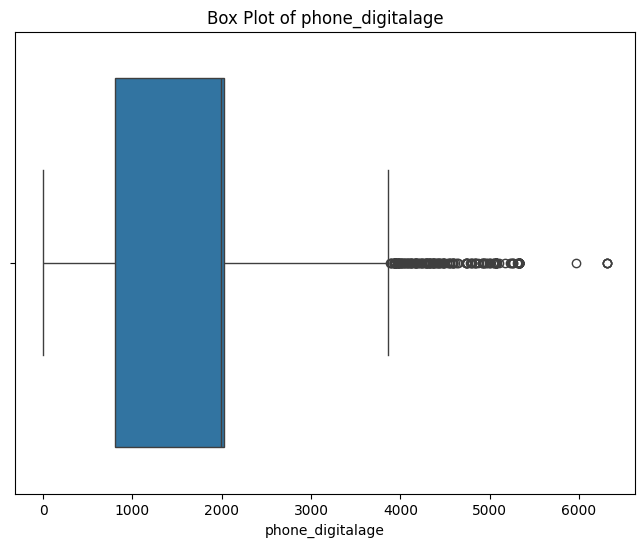

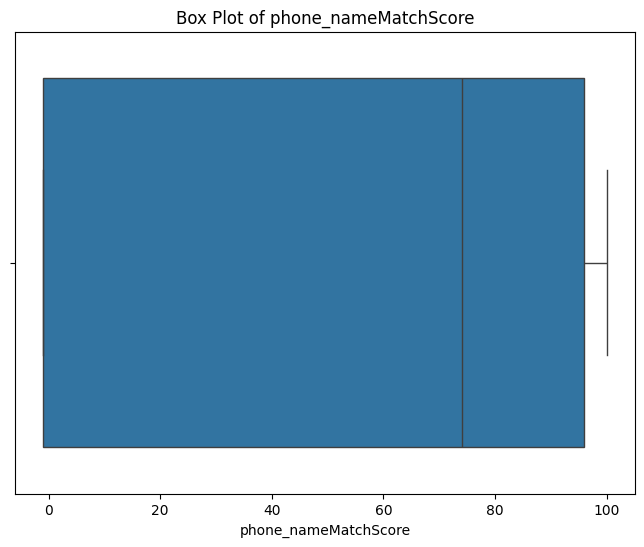

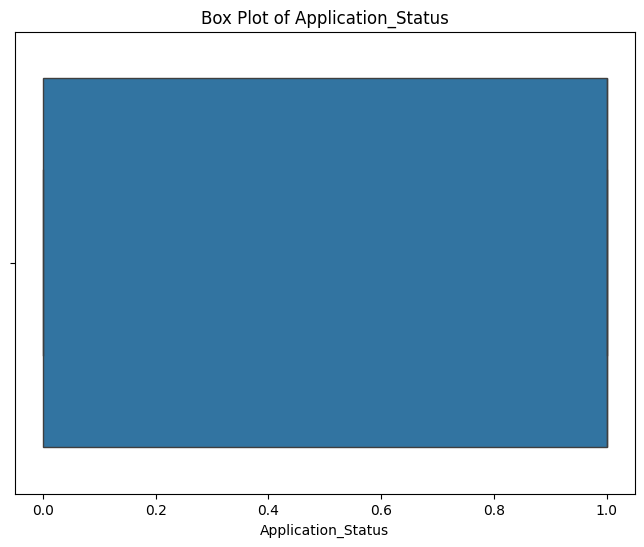

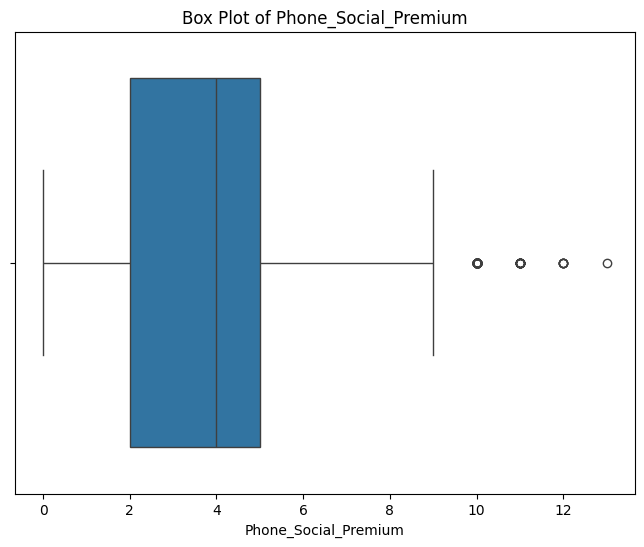

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots to visualize outliers
for column in df.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Box Plot of {column}')
  plt.show()


In [19]:

import numpy as np
from sklearn.impute import KNNImputer

numeric_cols = df.select_dtypes(include=np.number).columns

imputer = KNNImputer(n_neighbors=5)

df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 127 entries, DEALER_ID to phone_phoneFootprintStrengthOverall_Very Low
dtypes: bool(117), float64(10)
memory usage: 1.9 MB


Dimentionality reduction using the correlation value with the target

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()


In [22]:

threshold = 0.05

low_corr_cols = corr_matrix['Application_Status'][abs(corr_matrix['Application_Status']) < threshold].index

df = df.drop(low_corr_cols, axis=1)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Cibil_Score                          10000 non-null  float64
 1   Application_Status                   10000 non-null  float64
 2   ASSET_CTG_MCECA                      10000 non-null  bool   
 3   ASSET_CTG_MCECB                      10000 non-null  bool   
 4   ASSET_CTG_MCEXA                      10000 non-null  bool   
 5   ASSET_CTG_MCPRA                      10000 non-null  bool   
 6   ASSET_CTG_MOECA                      10000 non-null  bool   
 7   ASSET_CTG_SCECA                      10000 non-null  bool   
 8   ASSET_CTG_SCEXA                      10000 non-null  bool   
 9   PRIMARY_ASSET_MAKE_AMO ELECTRIC      10000 non-null  bool   
 10  PRIMARY_ASSET_MAKE_BAJAJ AUTO INDIA  10000 non-null  bool   
 11  MARITAL_STATUS_Married       

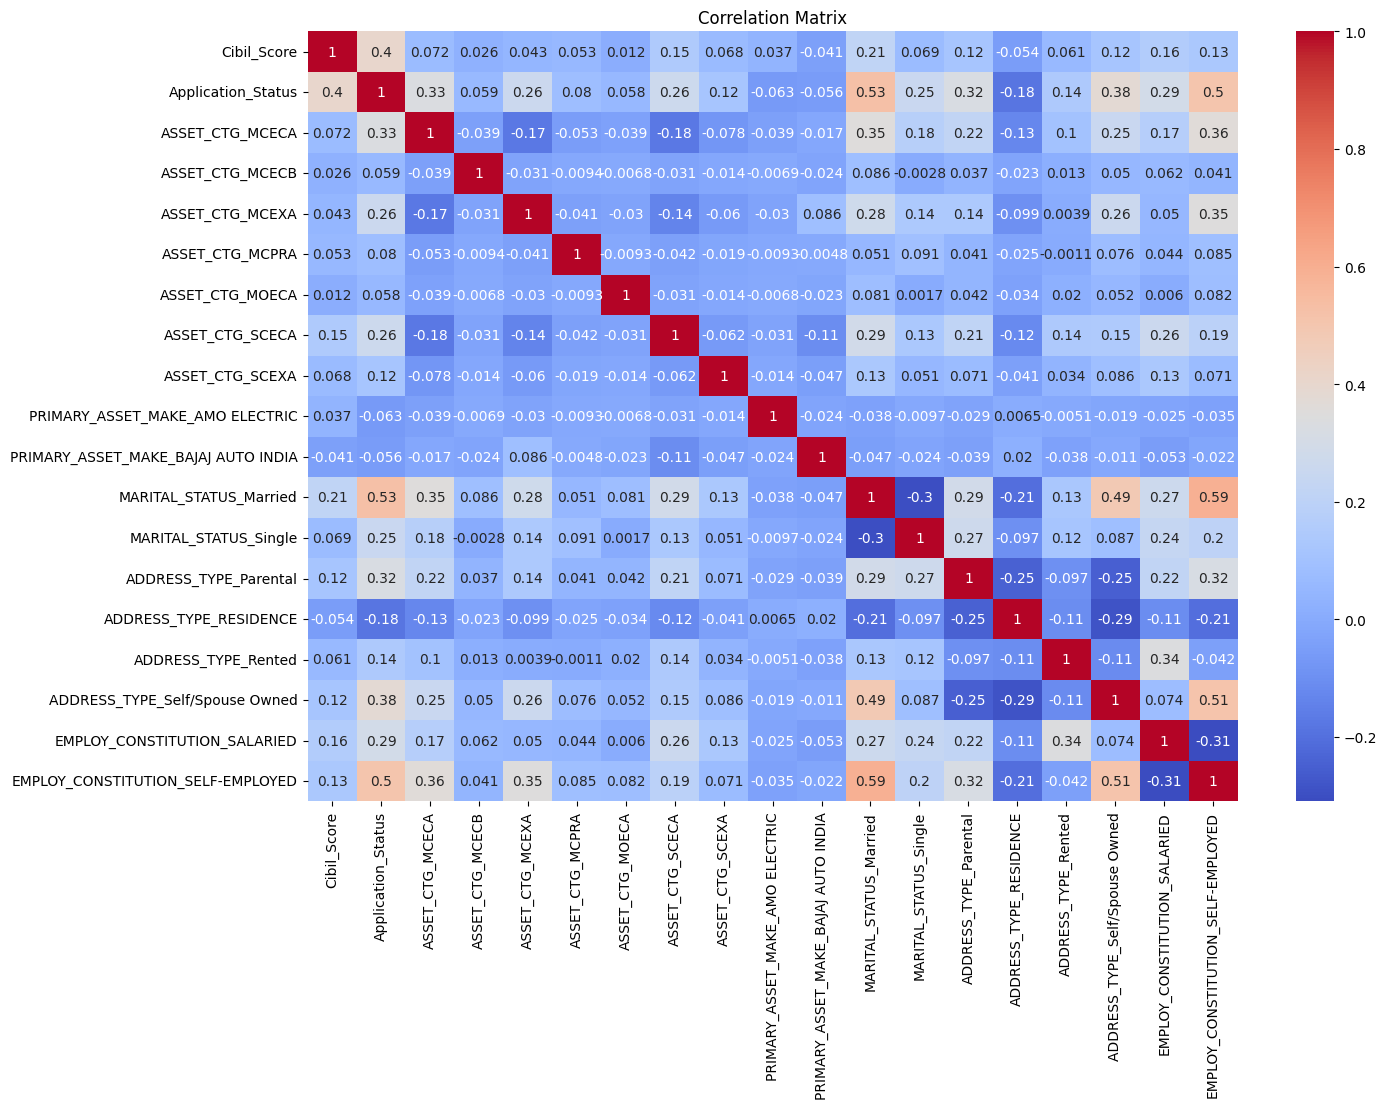

In [24]:
# prompt: find the correlation matrix of df plt

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Analysis

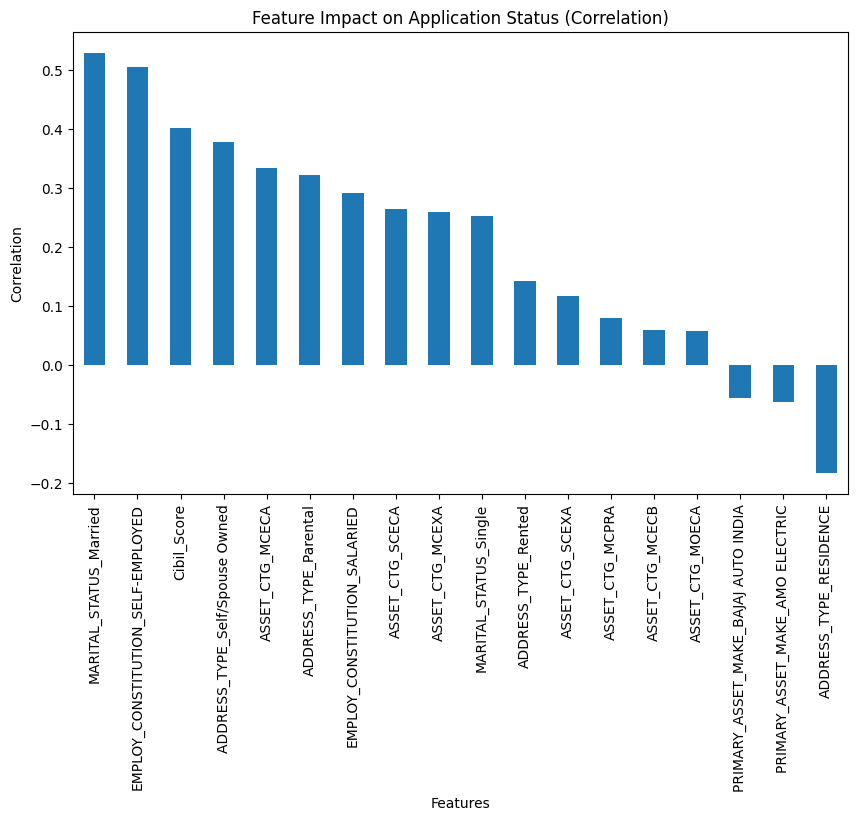

MARITAL_STATUS_Married                 0.528223
EMPLOY_CONSTITUTION_SELF-EMPLOYED      0.504676
Cibil_Score                            0.401799
ADDRESS_TYPE_Self/Spouse Owned         0.376542
ASSET_CTG_MCECA                        0.332874
ADDRESS_TYPE_Parental                  0.320870
EMPLOY_CONSTITUTION_SALARIED           0.290986
ASSET_CTG_SCECA                        0.263829
ASSET_CTG_MCEXA                        0.258780
MARITAL_STATUS_Single                  0.252239
ADDRESS_TYPE_Rented                    0.141851
ASSET_CTG_SCEXA                        0.116168
ASSET_CTG_MCPRA                        0.079692
ASSET_CTG_MCECB                        0.058803
ASSET_CTG_MOECA                        0.057939
PRIMARY_ASSET_MAKE_BAJAJ AUTO INDIA   -0.055533
PRIMARY_ASSET_MAKE_AMO ELECTRIC       -0.063041
ADDRESS_TYPE_RESIDENCE                -0.182610
Name: Application_Status, dtype: float64


In [25]:
# prompt: Generate a plot to show which feature of df has how much impact on acceptance status and print the correlation value

import matplotlib.pyplot as plt
# Calculate correlations with 'Application_Status'
correlations = df.corr()['Application_Status'].sort_values(ascending=False)

# Remove 'Application_Status' itself from the correlations
correlations = correlations.drop('Application_Status')

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Feature Impact on Application Status (Correlation)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

# Print the correlation values
print(correlations)


Draw the plots and get the info

Analysis

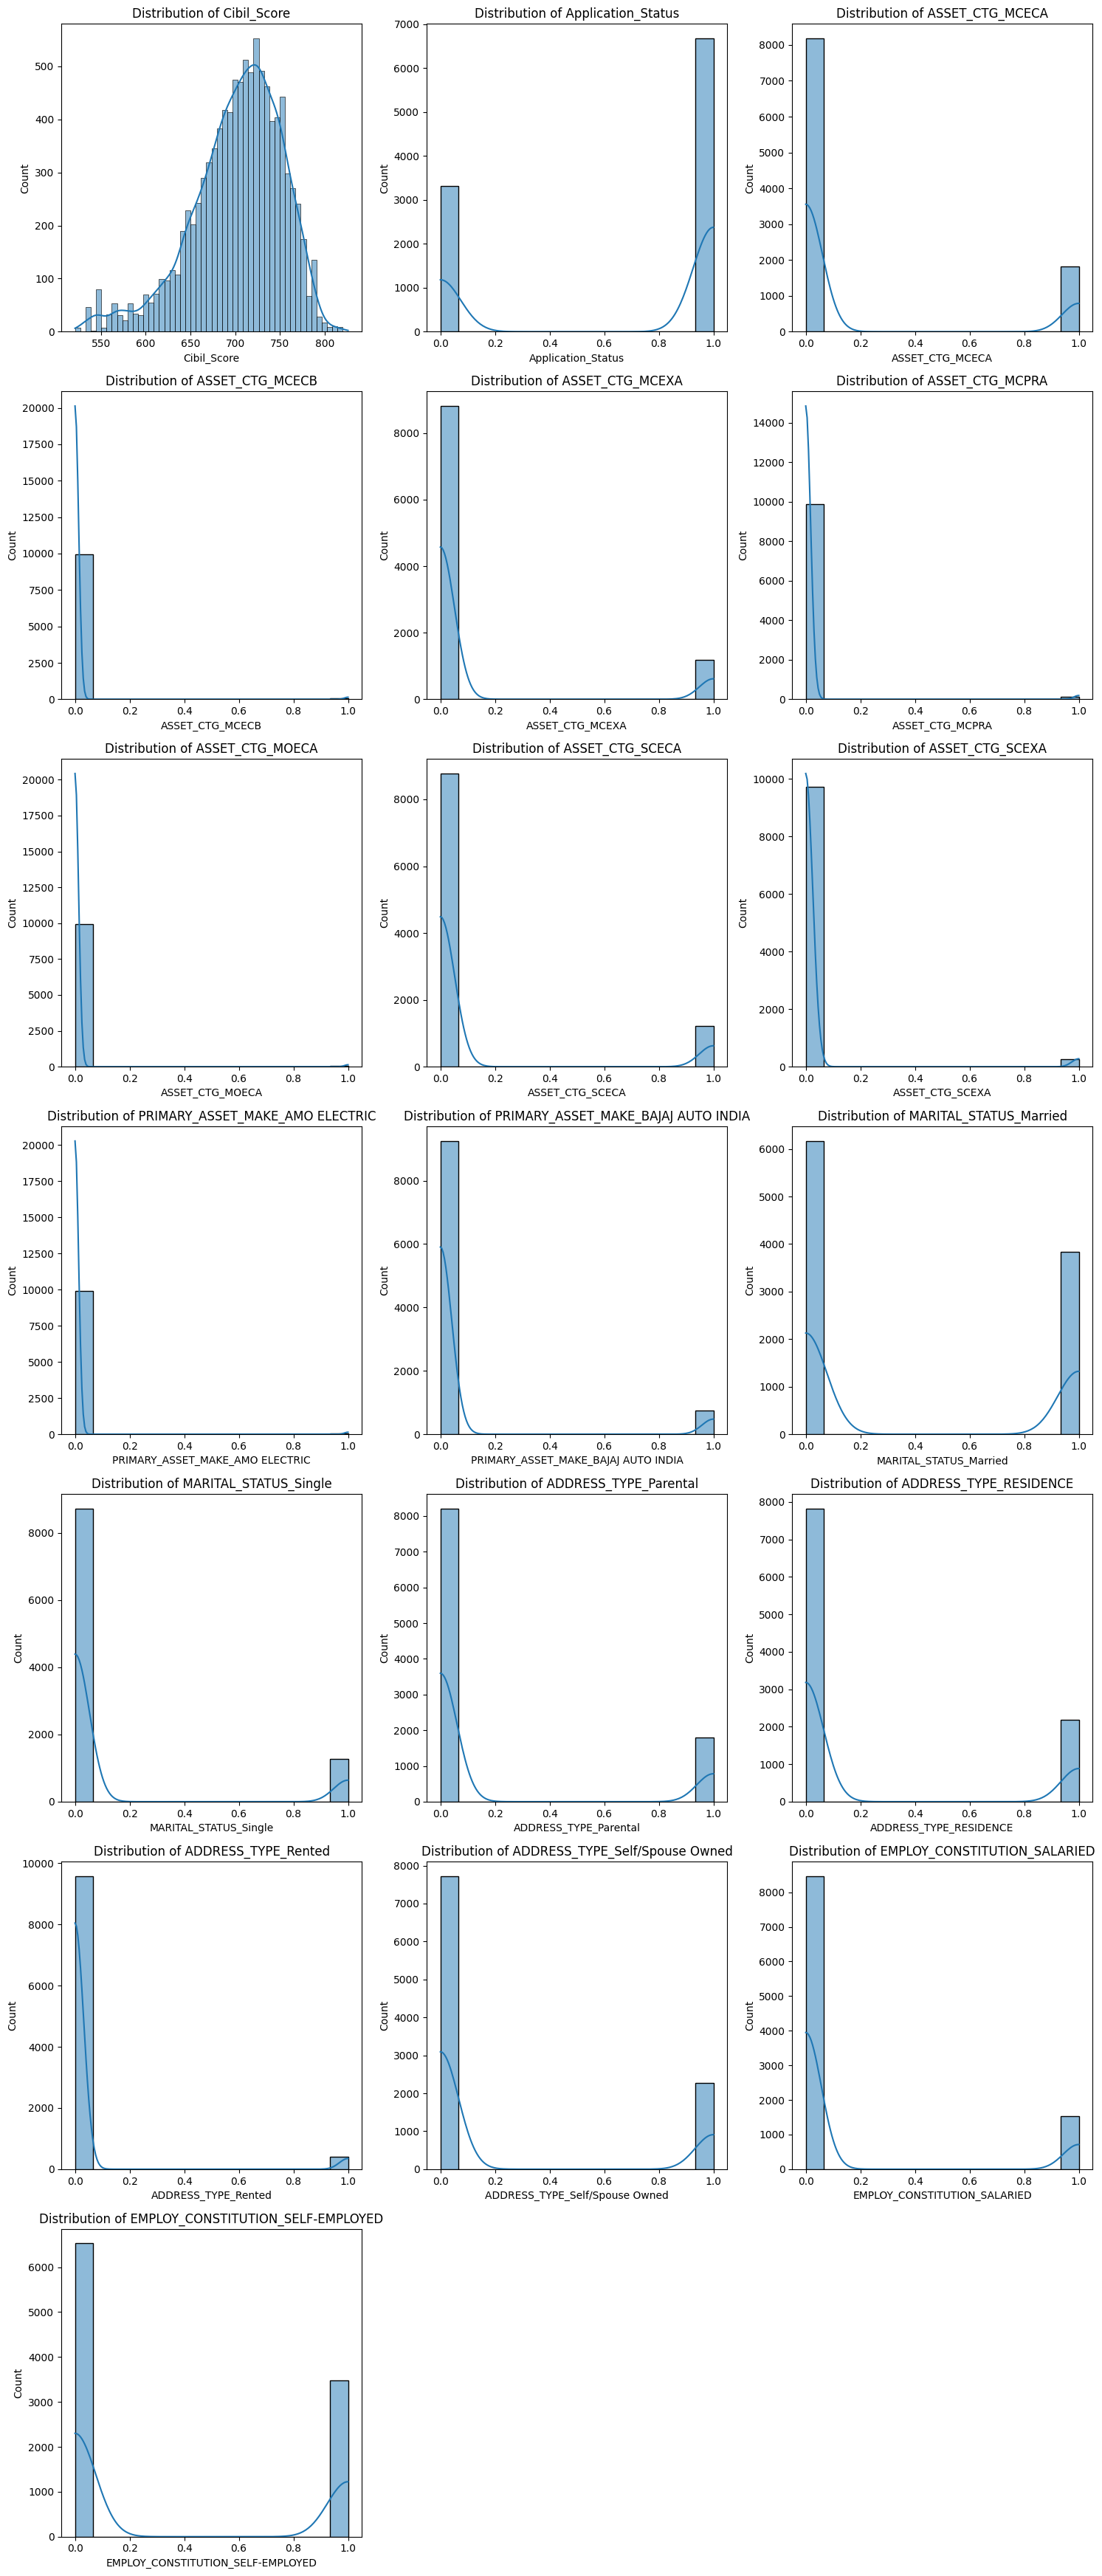

In [26]:
# prompt: Draw this in a single figure # prompt: draw plot for each of column
# import matplotlib.pyplot as plt
# import seaborn as sns
# for column in df.columns:
#     plt.figure()  # Create a new figure for each plot
#     if df[column].dtype == 'object':
#         # Categorical column: use countplot
#         sns.countplot(x=column, data=df)
#         plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if nee

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for a more organized display
num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3  # Calculate number of rows for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, column in enumerate(df.columns):
    ax = axes[i]
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    else:
        sns.histplot(x=column, data=df, ax=ax, kde=True)

    ax.set_title(f'Distribution of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Building baseline model

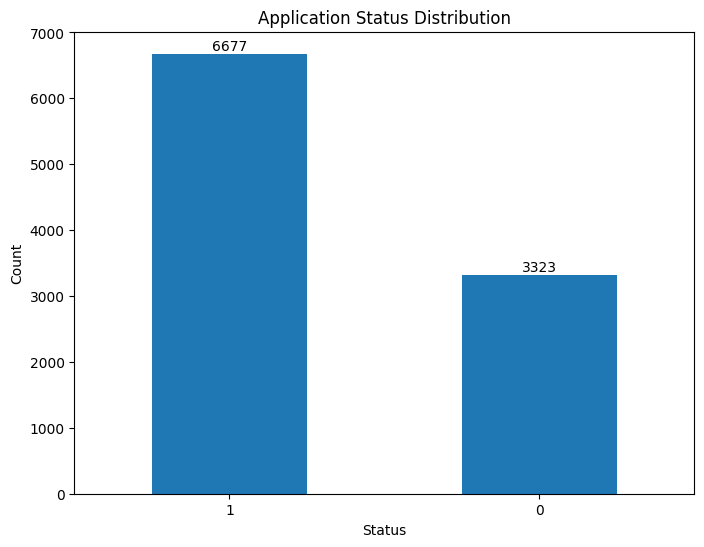

Approved Ratio: 0.67
Disapproved Ratio: 0.33


In [47]:
# prompt: Draw the plt of approved and disaproved and give the ratio

import matplotlib.pyplot as plt
# Count the occurrences of each application status
status_counts = df['Application_Status'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar')
plt.title('Application Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add labels to the bars
for i, count in enumerate(status_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# Calculate and print the ratio
approved_ratio = status_counts[1] / status_counts.sum()
disapproved_ratio = status_counts[0] / status_counts.sum()

print(f"Approved Ratio: {approved_ratio:.2f}")
print(f"Disapproved Ratio: {disapproved_ratio:.2f}")


In [43]:
# prompt: generate a model using df using many models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X = df.drop('Application_Status', axis=1)
y = df['Application_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Accuracy: 0.8505
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       673
           1       0.93      0.83      0.88      1327

    accuracy                           0.85      2000
   macro avg       0.83      0.86      0.84      2000
weighted avg       0.87      0.85      0.85      2000

--- Decision Tree ---
Accuracy: 0.832
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       673
           1       0.89      0.86      0.87      1327

    accuracy                           0.83      2000
   macro avg       0.81      0.82      0.81      2000
weighted avg       0.84      0.83      0.83      2000

--- Random Forest ---
Accuracy: 0.838
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       673
           1       0.88      0.87      0.88    

In [44]:
# prompt: hyper parameter tune the best model]

from sklearn.model_selection import GridSearchCV

# Assuming Random Forest is the best model based on previous evaluation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"--- Best Random Forest ---")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8575000000000002
--- Best Random Forest ---
Accuracy: 0.845
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       673
           1       0.87      0.90      0.89      1327

    accuracy                           0.84      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.84      0.84      0.84      2000



In [45]:
import joblib

joblib.dump(best_rf, 'grid_search.pkl')


['grid_search.pkl']

Using pca for dimentionality reduction

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [30]:

# Drop the target column from the feature set
df_features = df.drop('Application_Status', axis=1)

In [31]:
# Standardize the continuous features
scaler = StandardScaler()
df_features[['Cibil_Score']] = scaler.fit_transform(df_features[['Cibil_Score']])

In [32]:
# Convert boolean columns to integers
bool_columns = df_features.columns.difference(['Cibil_Score'])
df_features[bool_columns] = df_features[bool_columns].astype(int)

In [33]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
df_pca = pd.DataFrame(pca.fit_transform(df_features))

In [34]:
# prompt: in application status make the true as 1 and false as zero and then target = df['Application_Status']

df['Application_Status'] = df['Application_Status'].apply(lambda x: 1 if x == True else 0)
target = df['Application_Status']


In [35]:
# prompt: find all the differnet values in target

unique_values = target.unique()
print(unique_values)


[1 0]


In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_pca, target, test_size=0.2, random_state=42)

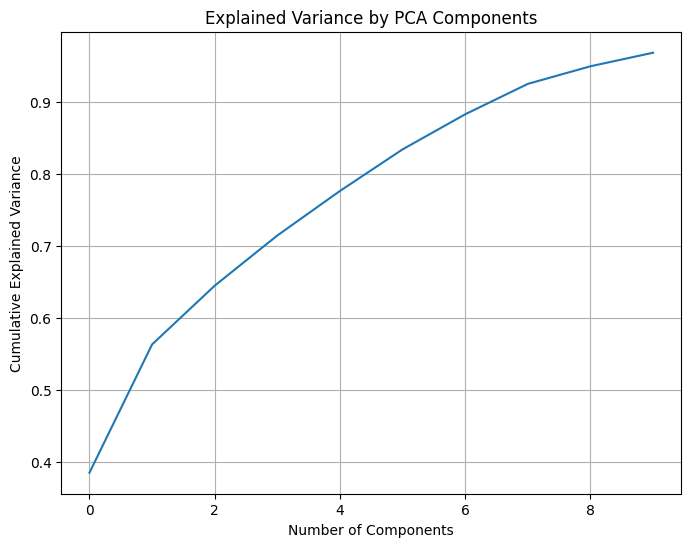

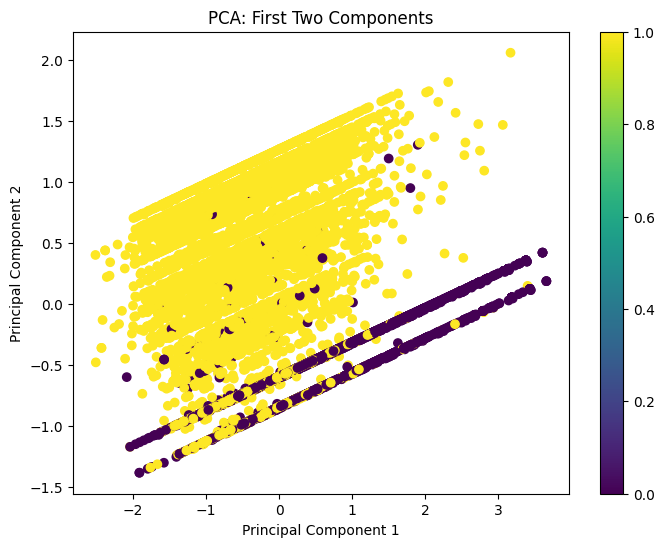

In [38]:
# prompt: make some plots to visulaise components

import matplotlib.pyplot as plt
import numpy as np
# Explained variance ratio plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Scatter plot of the first two components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=target, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Components')
plt.colorbar()
plt.show()


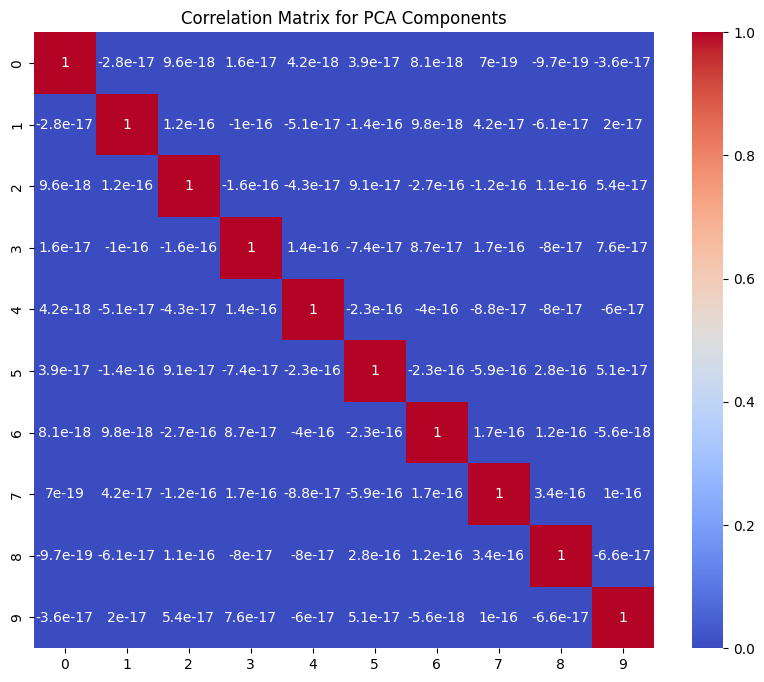

In [37]:
# prompt: draw the correlation for pca components

import matplotlib.pyplot as plt
# Calculate the correlation matrix for PCA components
corr_matrix_pca = df_pca.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pca, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for PCA Components")
plt.show()


In [40]:
# prompt: make other models and give their stats all the models togeather

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'report': report}

# Print results
for name, result in results.items():
    print(f"--- {name} ---")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['report']}")


--- Logistic Regression ---
Accuracy: 0.846
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       673
           1       0.92      0.85      0.88      1327

    accuracy                           0.85      2000
   macro avg       0.83      0.85      0.83      2000
weighted avg       0.86      0.85      0.85      2000

--- Decision Tree ---
Accuracy: 0.831
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       673
           1       0.88      0.86      0.87      1327

    accuracy                           0.83      2000
   macro avg       0.81      0.82      0.81      2000
weighted avg       0.83      0.83      0.83      2000

--- Random Forest ---
Accuracy: 0.838
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       673
           1       0.88      0.88      0.88     

In [41]:
# prompt: Hyper parameter tune the best model of pca i.e. gradient boosting

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print("--- Best Gradient Boosting Model ---")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_best)
print("Classification Report:\n", report_best)


--- Best Gradient Boosting Model ---
Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.846
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       673
           1       0.87      0.91      0.89      1327

    accuracy                           0.85      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.84      0.85      0.84      2000



In [42]:
# prompt: save the best best_model

import joblib

# Save the best model to a file
joblib.dump(best_model, 'best_gradient_boosting_model.pkl')


['best_gradient_boosting_model.pkl']